# Machine Learning: Random Forests in Python

## Overview

Pre-requisites: You must download tom.py from this week's Learn page and save the file to the same directory as this Jupyter notebook. You should also ensure that you have a copy of the Campus_Met_Data_Student.csv (the same file as used in the last regression practical). For your convenience, this file can also be downloaded from today's Learn page.

In this session you will implement the random forest machine (ensemble) learning algorithm. The coding is again mostly wrapped up for you in a 'random_forest' function from tom.py (the updated version of this module is available on this week's Learn page). This function works off exactly the same principle as last time: we first subtract the climatology (estimated with a sinusoid calibrated on 2016-2018), and then try to model the anomalies. Our final prediction is then the climatology + the anomalies as modelled by the random forest. 

Your task will be to run tom.random_forest a number of times, whilst changing (or 'tuning') some its parameters: the value used for (1) 'min_samples' and for (2) 'ntrees' -- in an attempt to improve the algorithm's performance. Note that (1) decides the minimum number of samples required to split an interior node; and (2) determines how many separate trees we should fit (with each individual tree trained on a randomly selected sub-sample of your data). If you need a reminder of these concepts, please refer back to the lecture slides. 


To make the tuning more straightforward for you, tom.random_forest will (if verbose = True) automatically print the $\it{MAE}$ for you to the screen, enabling you to quickly see how the error may have changed with the new parameter values. As last time (in the regression practical), it also returns (in the variable 'pred') the climatology, observed, and the precdicted values for 2019. 

To assist your tuning of the parameters, some initial research has also been done for you -- computing $\it{MAE}$ for combinations of ntrees between 1 and 105, and values of min_samples between 2 and 8. The results of this $\it{sensitivity}$ test are shown below. You should use this graphic to help constrain your search for suitable parameter values. 

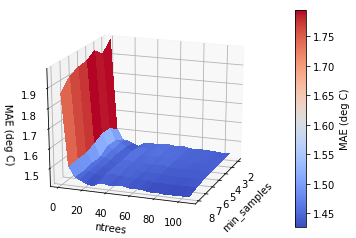


## Instructions
To get started, execute the code below to import relevant modules: 

In [ ]:
import tom, pandas as pd, numpy as np
import matplotlib.pyplot as plt

You should then familiarise yourself with the function that underpins today's machine-learning. 

Run the code below to see the help for tom.random_forest. Make sure you read about, and understand, the inputs and outputs to the function. Ask a member of staff if you are unsure. 

In [ ]:
help(tom.random_forest)

When you are ready, run the code below to do the normal tasks of reading in and converting the 15-minute data to daily-means. 

In [ ]:
fin="C:/Users/gytm3/OneDrive - Loughborough University/Teaching/GYP035/201920/StudentData/Campus_Met_Data_Student.csv"
data=pd.read_csv(fin,parse_dates=True,index_col=0)
data=data.resample("D").mean()

In the next chunk of code (below), I then set a few variables to make the subsequent call to tom.random_forest easier to follow:

- year_predict (set to 2019) specifies which year's data will be omitted from the training data (and therefore used instead to evaluate how well the model performs)
- vs is a list of strings corresponding to variables in 'data' which I think could be used in the machine learning algorithm to predict the next day's daily mean air temperature. You should restrict yourself to the same subset of variables. Passing this list as an index to a DataFrame is an efficient way of extracting those columns. Remember that if you need a reminder of the DataFrame's column names, you can run the code: 'print(data.columns)'; or  'data.head(5)' for a preview. 

In [ ]:
year_predict=2019
vs=["AirTC_Avg","RH","WS_ms_S_WVT","SlrkW_Avg","NR_Wm2_Avg","BP_mbar_Avg"]

Now we are ready to call tom.random_forest. Note that in the code below, I explicitly set the parameter values for ntrees and min_samples, before passing these to the function (with the syntax 'parameter name = parameter value'). This is for readability and to guard against entering the wrong value for a given parameter.   Also note that I use the "\\" character to break up my code across multiple lines - again for readibility. 

Run the code below to check eveything is working. 

In [19]:
ntrees=1
min_samples=2
pred,mae=tom.random_forest(target=data["AirTC_Avg"],predictors=data[vs],year_predict=year_predict,days_behind=1,\
                  min_samples=min_samples,ntrees=ntrees)

MAE (ntrees=1; min_samples=2) : 1.9833


Assuming you did not get an error message, consult the figure in the Overview section and begin tuning the ntrees and min_samples parameters. You should aim to get the $\it{MAE}$ as low as possible. 

## Your Challenge

This section is brief this week because you are now at a point where you should *already* know what is expected to evaluate the model's performance. As a brief guide: you should check the performance of the random forest model whose parameters yielded the lowest $\it{MAE}$. Remember that model evaluation entails scatter and line plots; and the quantification of errors. In this regard note that the tom.random_forest function will print the $\it{MAE}$ for you, and that the observed (called 'obs') and predicted (called 'sim') are named columns in the pred DataFrame returned by tom.random_forest (so, for example, you would access the simulated values with syntax: 'sim = pred["sim"]'). 